In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from pandasgui import show

In [2]:
diabetes_data = pd.read_csv("c:/Users/gary1/Documents/DSSA/Spring/diabetes_binary_health_indicators_BRFSS2015.csv")

In [3]:
diabetes_data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
columns_to_scale = ['MentHlth', 'PhysHlth', 'BMI'] # features that need to be rescaled

scale = StandardScaler()
diabetes_data[columns_to_scale] = scale.fit_transform(diabetes_data[columns_to_scale]) # scaling the selected columns data values
x = diabetes_data.drop(['Diabetes_binary'], axis = 1) # dropping diabetes column for x
y = diabetes_data['Diabetes_binary'] # y axis is diabetes


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # splitting the data set between train and test

feature_variances = X_train.var() # variance of features, checking to see which ones need to be dropped for better accuracy
print(feature_variances.sort_values())


CholCheck               0.035864
Stroke                  0.038931
AnyHealthcare           0.046576
HvyAlcoholConsump       0.053022
NoDocbcCost             0.077033
HeartDiseaseorAttack    0.085357
DiffWalk                0.139978
Veggies                 0.152803
PhysActivity            0.183910
Fruits                  0.231936
HighChol                0.244174
HighBP                  0.244848
Sex                     0.246452
Smoker                  0.246737
Education               0.973589
PhysHlth                1.000683
BMI                     1.001121
MentHlth                1.003729
GenHlth                 1.141136
Income                  4.294601
Age                     9.321333
dtype: float64


In [ ]:
pca = PCA(n_components = 0.95) # Using PCA to reduce dimensionality to explain 95% variance within the data set

x_train_pca = pca.fit_transform(X_train) # fit PCA to training data

x_test_pca = pca.transform(X_test) # same as above

model = LogisticRegression() # perform logistic regression
model.fit(x_train_pca, y_train) # trains model using PCA transformed data

y_prediction = model.predict(x_test_pca) # predicted values for test set

accuracy = accuracy_score(y_test, y_prediction)
intercept = model.intercept_
coefficients = model.coef_

# metrics
print(f'Accuracy: {accuracy}')
print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficients}')


Accuracy: 0.8648494165878272
Intercept: [-2.380503]
Coefficients: [[ 0.26272552 -0.2136367   0.48932759  0.51786866 -0.00209965 -0.12983632
  -0.4480463   0.34391835  0.5608754  -0.43690231  0.0963137 ]]


In [ ]:
new_x = x.drop(['CholCheck', 'Stroke', 'AnyHealthcare'], axis = 1) # removing low variance features

X_train, X_test, y_train, y_test = train_test_split(new_x, y, test_size=0.2, random_state=42)

# retraining the model
pca = PCA(n_components = 0.95)
x_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)

model = LogisticRegression()
model.fit(x_train_pca, y_train)

y_prediction = model.predict(x_test_pca)
accuracy = accuracy_score(y_test, y_prediction)

intercept = model.intercept_
coefficients = model.coef_

print(f'Accuracy: {accuracy}')
print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficients}')

Accuracy: 0.864672027751498
Intercept: [-2.37884471]
Coefficients: [[ 0.26297034 -0.21351229  0.48921899  0.51560785 -0.0030931  -0.12874091
  -0.44827832  0.34309314  0.54784784 -0.444629  ]]


In [ ]:
x_train_pca_filtered = np.delete(x_train_pca, 4, axis=1) # dropping PCA 5 for both test and train
x_test_pca_filtered = np.delete(x_test_pca, 4, axis=1)
# retraining the model again
model = LogisticRegression()
model.fit(x_train_pca_filtered, y_train)

y_prediction = model.predict(x_test_pca_filtered)
accuracy = accuracy_score(y_test, y_prediction)

print(f'Accuracy: {accuracy}') # accuracy did not change much indicating PC5 did not add any value to the model

Final Accuracy: 0.8647508672343109


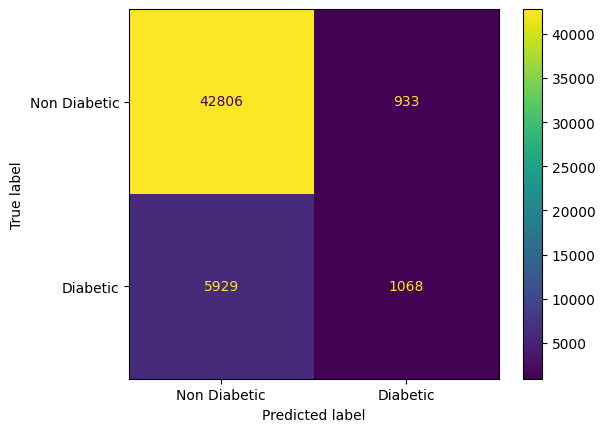

Sensitivity: 0.15263684436186936
Specificity: 0.9786689224719358
Accuracy: 0.8647508672343109


In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Non Diabetic', 'Diabetic'])
cm_display.plot()
plt.show()

true_negatives = metrics.confusion_matrix(y_test, y_prediction)[0,0] # True Non-Diabetic
true_positives = metrics.confusion_matrix(y_test, y_prediction)[1,1] # True Diabetic
false_positives = metrics.confusion_matrix(y_test, y_prediction)[0,1] # False positive (predicted diabetic, but actually non-diabetic)
false_negatives = metrics.confusion_matrix(y_test, y_prediction)[1,0] # False negative (predicted non-diabetic, but actually diabetic)

sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)
accuracy = (true_positives + true_negatives) / sum(sum(metrics.confusion_matrix(y_test, y_prediction)))

print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')
print(f'Accuracy: {accuracy}')

Sensitivity is very low, indicating the model is good at predicting who is Non Diabetic but is poor at predicting actual Diabetic populations.

In [ ]:
model_1 = LogisticRegression(class_weight = 'balanced') # This helps the model weigh the classes fairly and not biased towards non diabetics

model_1.fit(x_train_pca_filtered, y_train) # retraining the model again

y_prediction_1 = model_1.predict(x_test_pca_filtered) # new predictions


Accuracy: 0.728555660674866


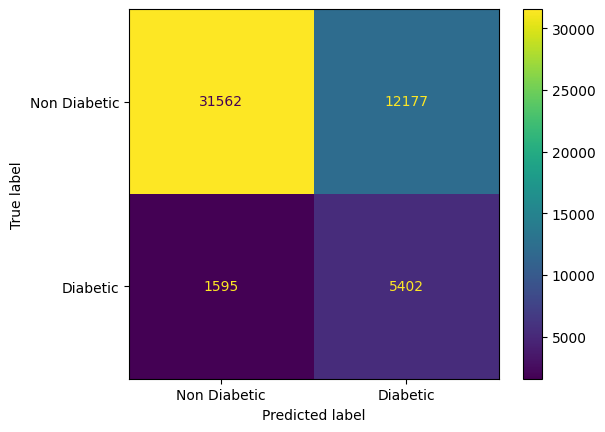

Sensitivity: 0.7720451622123767
Specificity: 0.7215985733555865
Accuracy: 0.728555660674866


In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_prediction_1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Non Diabetic', 'Diabetic'])
cm_display.plot()
plt.show()

true_negatives = metrics.confusion_matrix(y_test, y_prediction_1)[0,0]
true_positives = metrics.confusion_matrix(y_test, y_prediction_1)[1,1]
false_positives = metrics.confusion_matrix(y_test, y_prediction_1)[0,1]
false_negatives = metrics.confusion_matrix(y_test, y_prediction_1)[1,0]

sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)
accuracy = (true_positives + true_negatives) / sum(sum(metrics.confusion_matrix(y_test, y_prediction_1)))

print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')
print(f'Accuracy: {accuracy}')

Accuracy did decrease but there was significant improvements with sensitivity with the new model indicating better detection for diabetes.

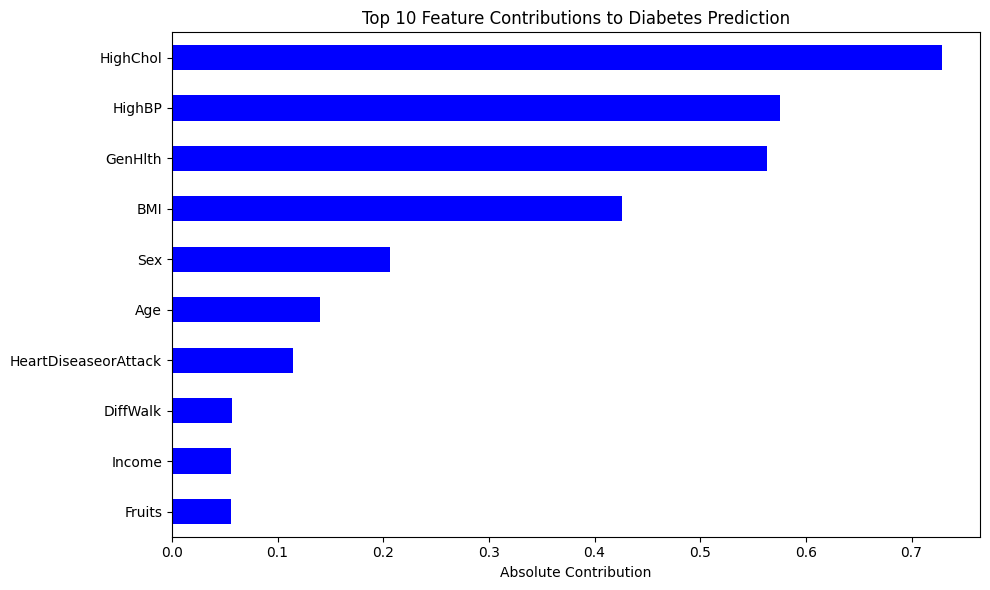

In [ ]:
adjusted_components = np.delete(pca.components_, 4, axis=0)  # remove PC5 row from PCA

pc_weights = model.coef_[0] # Get coefficients per each PCA

weighted_contributions = np.dot(pc_weights, adjusted_components) # Creates a new array of weights and PCAs indicating feature importance for diabetes

feature_importance = pd.Series(np.abs(weighted_contributions), index=new_x.columns).sort_values(ascending=False) # Absolute value of new array with each values original feature name.


import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(kind='barh', color='blue')
plt.title('Top 10 Feature Contributions to Diabetes Prediction')
plt.xlabel('Absolute Contribution')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

High cholesterol, High Blood pressure and general health contribute the most to predicting diabetes